# Discrete Fourier Transform (*D.F.T*)

Trigonometric expression of the *D.F.T.* (similar to Fourier series):

### Discrete Fourier Series (2nd trigonometric form)
$$
x(n) = A_0 + \sum_{k=1}^{L}\left[A(k)\cos\left(\frac{2\pi k n}{N}\right)+B(k)\sin\left(\frac{2\pi k n}{N}\right)\right]
$$
$$
\text{where: } L=\frac{N}{2} \text{when } N \text{ is even, or } L=\frac{(N-1)}{2} \text{ when } N \text{ is odd}
$$

### Fourier Coefficients

$$
A(k) = \frac{2}{N} \sum_{n=0}^{N-1} x(n) \cos{\frac{2\pi k n}{N}}
$$
$$
B(k) = \frac{2}{N} \sum_{n=0}^{N-1} x(n) \sin{\frac{2\pi k n}{N}}
$$
$$
A(0)=\frac{1}{N} \sum_{n=0}^{N-1}x(n)
$$

### *D.F.T.*
$$
X(k)=\frac{1}{2}A(k)-\frac{i}{2}B(k)
$$

### Amplitude Spectrum
$$
|X(k)|=\frac{1}{2}\sqrt{A(k)^2+B(k)^2}
$$

### Phase Spectrum
$$
\varphi(k) = \tan^{-1}\left[-\frac{B(k)}{A(k)}\right]
$$

Due to the implicit simetry of $\sin$ and $\cos$ functions in the computations of the Fourier Coefficients:

$$
k=0,1,2, ..., \frac{N}{2} \qquad \text{when } N \text{ is even}
$$
$$
k=0,1,2, ..., \frac{N-1}{2} \qquad \text{when } N \text{ is odd}
$$

### Libraries to import

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

### Lis of Functions

__FUNC_fourierCoefficients__

$$
A(k) = \frac{2}{N} \sum_{n=0}^{N-1} x(n) \cos{\frac{2\pi k n}{N}}
$$
$$
B(k) = \frac{2}{N} \sum_{n=0}^{N-1} x(n) \sin{\frac{2\pi k n}{N}}
$$
$$
A(0)=\frac{1}{N} \sum_{n=0}^{N-1}x(n)
$$

__FUNC_DFS__

__FUNC_amplitudeSpectrum__

$$
|X(k)|=\frac{1}{2}\sqrt{A(k)^2+B(k)^2}
$$

__FUNC_phaseSpectrum__

$$
\varphi(k) = \tan^{-1}\left[-\frac{B(k)}{A(k)}\right]
$$

In [2]:
def FUNC_fourierCoefficients(x):
    # x is a 1D numpy array
    N = len(x)

    # "Odd" if n%2 else "even"
    L = (N-1)/2 if N % 2 else N/2
    L = int(L)
    
    A = np.zeros((2,L))  # 2D numpy array, float64 by default, filled with zeros
                            # First 1D array for A(k) and second 1D for B(k)
    B = np.zeros((2,L))

    A0 = np.sum(x)/N
    
    for k in range(1,L+1):   # So it goes from 1 to L (remember how Python indexes work)
        for n in range(N):

            A[0, k-1] = A[0, k-1] + x[n] * np.cos((2*np.pi*k*n)/(N))
            B[1, k-1] = B[1, k-1] + x[n] * np.sin((2*np.pi*k*n)/(N))

    A[:,:] = A[:,:] *2.0/N
    B[:,:] = B[:,:] *2.0/N
    return(A0, A[0, :], B[1, :])



def FUNC_DFS(A0, A, B, N):  #Discrete Fourier Series
    L = len(A)
    
    x = np.full((N), A0)
    
    for n in range(N):
        for k in range(1, L+1):

            x[n] = x[n] + (A[k-1] * np.cos((2*np.pi*k*n)/N) + B[k-1] * np.sin((2*np.pi*k*n)/N))

    
    return x



def FUNC_amplitudeSpectrum(A, B):
    L = len(A)
    Amp_X = np.zeros(L)

    for k in range(L):
        Amp_X[k] = (0.5) * ((A[k])**2 + (B[k])**2)**(0.5)
        
    return Amp_X



def FUNC_phaseSpectrum(A, B):
    L = len(A)
    PhasePhi_X = np.zeros(L)

    for k in range(L):
        PhasePhi_X[k] = np.arctan(-B[k]/A[k])
    return PhasePhi_X

In [23]:
pi = math.pi

t0 = 0.0        # ax_t of first sample

fm = 40
dt = 1/fm


#dt = 0.002      # Define dt (Sampling interval or Sampling period)
#fm = 1/dt       # fm: Sampling frequency or sampling rate
wm = 2*pi*fm    # wm: Sampling angular frequency or sampling angular rate


T = 10        # Observation period
f0 = 1/T        # Fundamental frequency
w0 = 2*pi*f0    # Fundamental angular frequency
print(f'''
Sampling interval (period): {dt} [s]
Sampling frequency (rate): {fm} [Hz]
Sampling angular frequency (angular rate): {wm} [Hz]
Observation period: {T} [s]
Fundamental frequency: {f0} Hz
Fundamental angular frequency: {w0} Hz
''')

# Creating ax_t axis
ax_t = np.arange(t0*1000,(T+dt)*1000,dt*1000)/1000
N = len(ax_t)

fp = N/2*f0     # Folding frequency
wp = 2*pi*fp    # Angular folding frequency

# print(ax_t)
print(f'''
Number of samples: {N}
Folding frequency: {fp}
Angular folding frequency: {wp}
''')

# Building the frequency axis

# if N % 2:   # Odd
#     ax_f = np.linspace(-fp,fp,num=N)
# else:       # Even
#     ax_f = np.linspace(-fp-f0,fp,num=N)

# odd if N%2 is TRUE, else 
ax_f = np.linspace(-fp,fp,num=N) if N % 2 else np.linspace(-fp-f0,fp,num=N)
# ax_f



Sampling interval (period): 0.025 [s]
Sampling frequency (rate): 40 [Hz]
Sampling angular frequency (angular rate): 251.32741228718345 [Hz]
Observation period: 10 [s]
Fundamental frequency: 0.1 Hz
Fundamental angular frequency: 0.6283185307179586 Hz


Number of samples: 401
Folding frequency: 20.05
Angular folding frequency: 125.9778654089507



### Generating function
### Calculating Fourier Coefficients
### Calculating original function through Fourier Coefficients
### Computing amplitude and phase spectrum

In [24]:
# Defning my function
funX = np.sin(10*2*pi*ax_t) + np.sin(15*2*pi*ax_t)
#funX = np.sin(15*2*pi*ax_t)


A0, A, B = FUNC_fourierCoefficients(funX)

funX2 = FUNC_DFS(A0, A, B, N)

ampSpectrum = FUNC_amplitudeSpectrum(A, B)
phaseSpectrum = FUNC_phaseSpectrum(A, B)

In [25]:
ax_t_analog = np.arange(t0*1000,(T+0.002)*1000,0.002*1000)/1000
funX_analog = np.sin(10*2*pi*ax_t_analog) + np.sin(15*2*pi*ax_t_analog)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


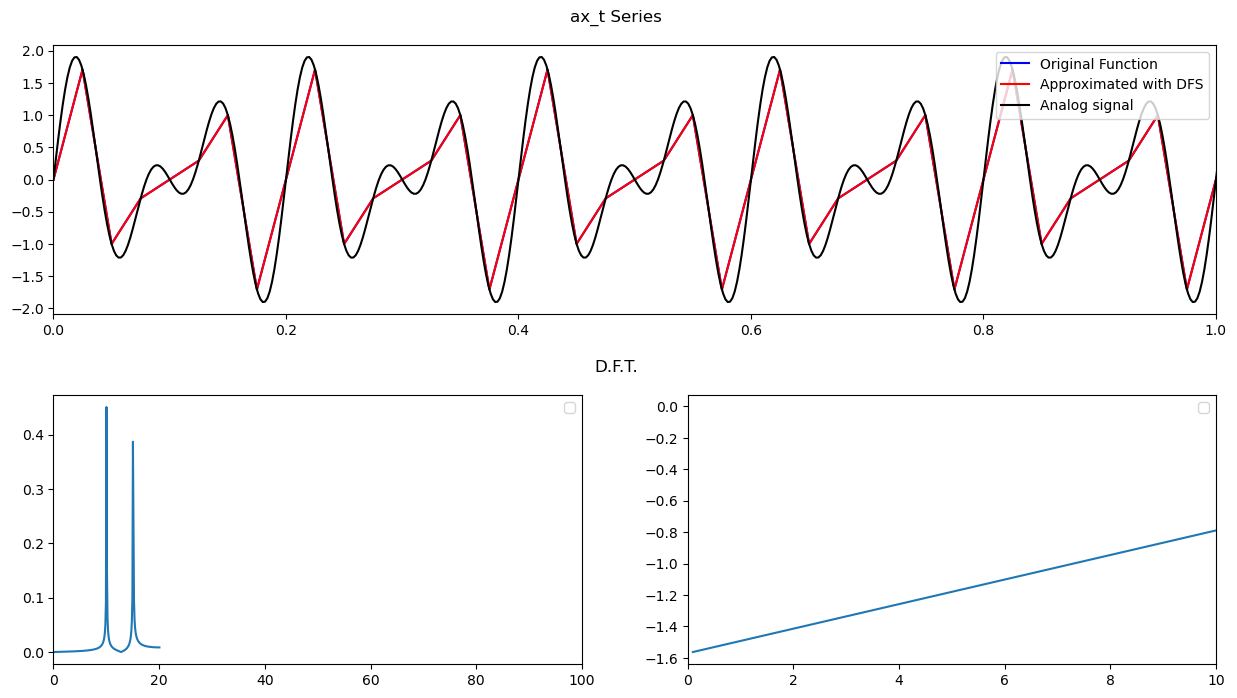

In [27]:
fig = plt.figure(figsize=(15,7))

(topfig, bottomfig) = fig.subfigures(2,1)

topfig.suptitle('ax_t Series')
bottomfig.suptitle('D.F.T.')

top_axs = topfig.subplots(1,1)
bottom_axs = bottomfig.subplots(1,2)

ax = top_axs    # ax_t Series
ax.plot(ax_t, funX, color='b', label='Original Function')
ax.plot(ax_t, funX2, color='r', label='Approximated with DFS')
ax.plot(ax_t_analog, funX_analog, color='k', label='Analog signal')
ax.set_xlim(0,1)
ax.legend()

ax = bottom_axs[0]    # Amplitude Spectrum
ax.plot(ax_f[int((N+1)/2):],ampSpectrum)
ax.set_xlim(0,100)
ax.legend()

ax = bottom_axs[1]    # Phase Spectrum
ax.plot(ax_f[int((N+1)/2):],phaseSpectrum)
ax.set_xlim(0,10)
ax.legend()

# NOTES
## Discrete periodic signal (REVIEW THIS, POSSIBLE WRONG):

$x(n)$ is a periodic signal with period $N$ if:

$$
x(n+N)=x(n)
$$

The DFT of a transitory signal, of finite duration is computed using Fourier coefficients for discrete and periodic signals

$$
X(k) = \frac{1}{N}\sum_{n=0}^{N-1} x(n) e^{-\frac{i2\pi kn}{N}} \qquad \forall \; k=0,1,2,3,...,N-1 \qquad\qquad \rightarrow \text{DFT}
$$

$$
x(n) = \sum_{k=0}^{N-1} X(k) e^{\frac{i2\pi kn}{N}} \qquad \forall \; n=0,1,2,3,...,N-1 \qquad\qquad \rightarrow \text{DFIT}
$$

Due to simetry in $\sin$ and $\cos$ functions implicit in the computation of Fourier coefficients:
$$
k=0,1,2,...,\frac{N}{2} \qquad N \text{is even}
$$

$$
k=0,1,2,...,\frac{N-1}{2} \qquad N \text{is odd}
$$

$k$ is a variable associated to the frequency (armonic index or number)